In [ ]:
import pandas as pd

# ---------- STEP 1: DATA COLLECTION ---------- #

# Load each dataset manually (using the exact file names you uploaded)
amazon_sales = pd.read_csv("/content/drive/MyDrive/dataset/Amazon Sale Report.csv", encoding='latin1')
sale_report = pd.read_csv("/content/drive/MyDrive/dataset/Sale Report.csv", encoding='latin1')
international_sales = pd.read_csv("/content/drive/MyDrive/dataset/International sale Report.csv", encoding='latin1')
may_2022_sales = pd.read_csv("/content/drive/MyDrive/dataset/May-2022.csv", encoding='latin1')
warehouse_comparison = pd.read_csv("/content/drive/MyDrive/dataset/Cloud Warehouse Compersion Chart.csv", encoding='latin1')
expenses = pd.read_csv("/content/drive/MyDrive/dataset/Expense IIGF.csv", encoding='latin1')
profit_loss = pd.read_csv("/content/drive/MyDrive/dataset/P  L March 2021.csv", encoding='latin1')

# Put all datasets into a dictionary for easy access
datasets = {
    "amazon_sales Sales Report": amazon_sales,
    "Sale Report": sale_report,
    "International Sales": international_sales,
    "May 2022 Sales": may_2022_sales,
    "Warehouse Comparison": warehouse_comparison,
    "Expenses": expenses,
    "Profit & Loss": profit_loss
}

# Preview (show first 5 rows and data structure of each dataset)
for name, df in datasets.items():
    print(f"\n---------------- {name} ----------------")
    print(df.head())   # Show first 5 rows
    print(df.info())   # Column names + data types + missing values




/tmp/ipython-input-689832473.py:6: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon_sales = pd.read_csv("/content/drive/MyDrive/dataset/Amazon Sale Report.csv", encoding='latin1')



---------------- amazon_sales Sales Report ----------------
   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    s

In [ ]:
amazon_sales.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [ ]:
# ------ step 2:DATA CLEANING ------#
##Drop unnecessary columns##
amazon_sales.drop(columns=['index','Unnamed: 22'],inplace=True,errors='ignore')

##Convert Date column to datetime##
amazon_sales['Date'] = pd.to_datetime(amazon_sales['Date'])

##Clean numeric fields##
amazon_sales['Qty'] = pd.to_numeric(amazon_sales['Qty'], errors='coerce')
amazon_sales['Amount'] = pd.to_numeric(amazon_sales['Amount'], errors='coerce')

##Clean text columns:  Strip extra spaces → make data consistent##
for col in amazon_sales.select_dtypes(include='object').columns:
    amazon_sales[col] = amazon_sales[col].astype(str).str.strip()

##Handle missing values##
amazon_sales['Courier Status'].fillna("Unknown", inplace=True)
amazon_sales['currency'].fillna("INR", inplace=True)
amazon_sales['ship-city'].fillna("Unknown", inplace=True)
amazon_sales['ship-state'].fillna("Unknown", inplace=True)

##Remove duplicates##
amazon_sales.drop_duplicates(inplace=True)

##Create Revenue column##
amazon_sales['Revenue'] = amazon_sales['Qty'] * amazon_sales['Amount']








/tmp/ipython-input-3574183635.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  amazon_sales['Date'] = pd.to_datetime(amazon_sales['Date'])
/tmp/ipython-input-3574183635.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon_sales['Courier Status'].fillna("Unknown", inplace=True)
/tmp/ipython-input-3574183635.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame

In [ ]:
amazon_sales.head()


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Revenue
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,nan,False,Easy Ship,0.0
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,406.0
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,nan,329.0
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,nan,False,Easy Ship,0.0
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,nan,False,nan,574.0


In [ ]:
## ------ step 3: feature engineering -----#
#Extract Year, Month, and Month Name#
amazon_sales['Year']=amazon_sales['Date'].dt.year
amazon_sales['Month']=amazon_sales['Date'].dt.month
amazon_sales['Month Name']=amazon_sales['Date'].dt.strftime('%b')

#Create "Order_Month" for trend analysis##
amazon_sales['Order_Month'] = amazon_sales['Date'].dt.to_period('M')

#Standardize City & Category Columns#
amazon_sales['ship-city']=amazon_sales['ship-city'].str.title()
amazon_sales['Category']=amazon_sales['Category'].str.title()

#Create a “Weekday” column#
amazon_sales['Weekday']=amazon_sales['Date'].dt.day_name()

#Create a Clean Customer Column#
if 'customer-name' in amazon_sales.columns:
    amazon_sales['customer-name']=amazon_sales['customer-name'].fillna("Guest")

#Classify orders as B2B or B2C#
amazon_sales['Order_Type']=amazon_sales['B2B'].apply(lambda x: "B2B" if x else "B2C")

amazon_sales.head()
amazon_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128969 entries, 0 to 128974
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128969 non-null  object        
 1   Date                128969 non-null  datetime64[ns]
 2   Status              128969 non-null  object        
 3   Fulfilment          128969 non-null  object        
 4   Sales Channel       128969 non-null  object        
 5   ship-service-level  128969 non-null  object        
 6   Style               128969 non-null  object        
 7   SKU                 128969 non-null  object        
 8   Category            128969 non-null  object        
 9   Size                128969 non-null  object        
 10  ASIN                128969 non-null  object        
 11  Courier Status      128969 non-null  object        
 12  Qty                 128969 non-null  int64         
 13  currency            128969 non-nul

In [ ]:
#filling null values in amount and revenue#
amazon_sales['Amount']=amazon_sales['Amount'].fillna(0)
amazon_sales['Revenue']=amazon_sales['Revenue'].fillna(0)

amazon_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128969 entries, 0 to 128974
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128969 non-null  object        
 1   Date                128969 non-null  datetime64[ns]
 2   Status              128969 non-null  object        
 3   Fulfilment          128969 non-null  object        
 4   Sales Channel       128969 non-null  object        
 5   ship-service-level  128969 non-null  object        
 6   Style               128969 non-null  object        
 7   SKU                 128969 non-null  object        
 8   Category            128969 non-null  object        
 9   Size                128969 non-null  object        
 10  ASIN                128969 non-null  object        
 11  Courier Status      128969 non-null  object        
 12  Qty                 128969 non-null  int64         
 13  currency            128969 non-nul

In [ ]:
#------step-4:EDA-------#
#Total Revenue, Total Orders, AOV#
total_revenue=amazon_sales['Revenue'].sum()
total_orders=amazon_sales['Order ID'].nunique()
average_order_value=total_revenue/total_orders

print("Total_Revenue:",total_revenue)
print("Total_Orders:",total_orders)
print("Average_order_values:",average_order_value)

Total_Revenue: 76031771.0
Total_Orders: 120378
Average_order_values: 631.6085248135041


In [ ]:
#Monthly Revenue Trend#
monthly_revenue=amazon_sales.groupby('Month Name')['Revenue'].sum()
print(monthly_revenue)

Month Name
Apr    27847245.0
Jun    22761054.0
Mar       98261.0
May    25325211.0
Name: Revenue, dtype: float64


In [ ]:
#Top10 Best selling categories#
top_categories=amazon_sales.groupby('Category')['Revenue'].sum().sort_values(ascending=False).head(10)
print(top_categories)

Category
Set              37932332.0
Kurta            20674816.0
Western Dress    10707932.0
Top               5242931.0
Ethnic Dress       762949.0
Blouse             441259.0
Bottom             142870.0
Saree              125767.0
Dupatta               915.0
Name: Revenue, dtype: float64


In [ ]:
#top10 cities by revenue#
top_cities=amazon_sales.groupby('ship-city')['Revenue'].sum().sort_values(ascending=False).head(10)
print(top_cities)

ship-city
Bengaluru    7104012.0
Hyderabad    5432409.0
Mumbai       4173450.0
New Delhi    3819410.0
Chennai      3500826.0
Pune         2716064.0
Kolkata      1629762.0
Gurugram     1250695.0
Thane        1072673.0
Lucknow      1006986.0
Name: Revenue, dtype: float64


<Axes: title={'center': 'Quantity Sold Distribution'}, ylabel='Frequency'>

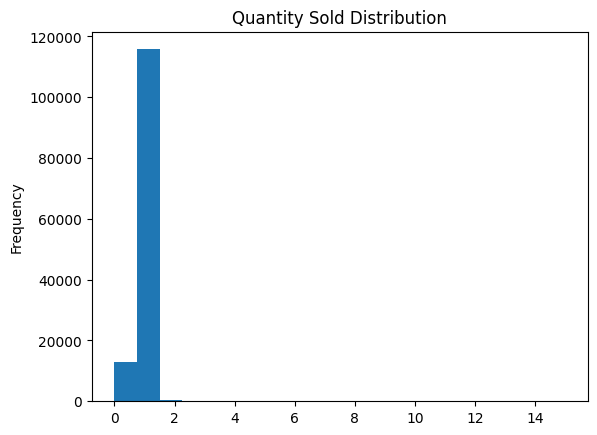

In [ ]:
#Quantity sold distribution#
#meaning:It draws a histogram to show how many orders were placed with different quantities#
amazon_sales['Qty'].plot(kind='hist',bins=20,title='Quantity Sold Distribution')

# **observations**
1.Most orders have a quantity of 1,showing customers usually buy a single item.
2.Orders with quantity greater than 2 are rare,indicating very few bulk purchases.
3.The sales purchase is primiraly B2C,not wholesale-driven.
4.Higher quantity orders from a small long tail,representing occasional bulk buyers.
5.As quantity increases,the number of orders consistently increases.


<Axes: title={'center': 'Revenue by Weekday'}, xlabel='Weekday'>

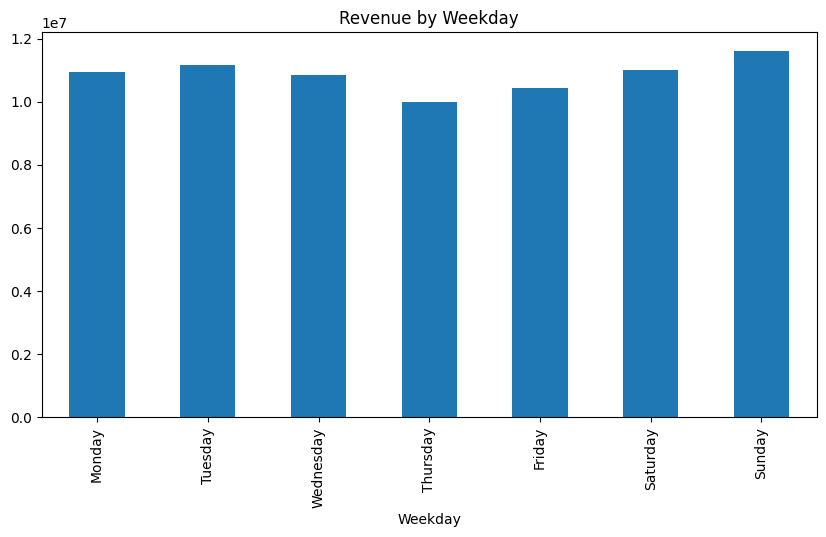

In [ ]:
#Weekday sales Trend#
weekday_sales=amazon_sales.groupby('Weekday')['Revenue'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
weekday_sales.plot(kind='bar',figsize=(10,5),title="Revenue by Weekday")

# **Observations**
1.Revenue is higher in weekends,showing increased customer activity on Saturday and sunday.
2.Weekday sales remain relatively stable,with minor variations across monday to friday.
3.Customers tend to shop more during non-working days ,driving weekend revenue spikes.
4.The chart helps identify best days for promotions and campaigns.

In [ ]:
amazon_sales.to_csv("amazon_cleaned_sales.csv",index=False)